In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(2023)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

In [21]:
inputs = torch.randint(0, 255, size=(1, 28, 28))

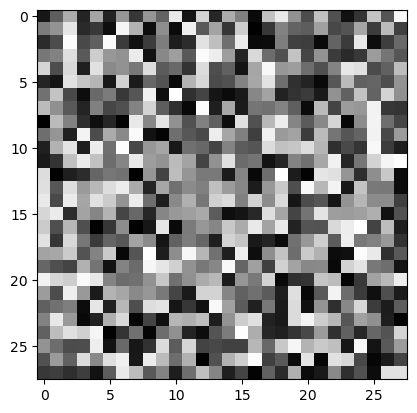

In [22]:
plt.imshow(inputs.squeeze(0), cmap="gray")
plt.show()

In [62]:
x = nn.Conv2d(1, 128, 3, padding=1, stride=2)(inputs.float())
print(x.size())

x = nn.Conv2d(128, 64, 3, padding=1, stride=2)(x)
print(x.size())

x = nn.Conv2d(64, 32, 3, padding=1, stride=2)(x)
print(x.size())

# x = nn.Conv2d(32, 16, 3, padding=1, stride=2)(x)
# print(x.size())

# x = nn.Conv2d(16, 8, 3, padding=1, stride=2)(x)
# print(x.size())


torch.Size([128, 14, 14])
torch.Size([64, 7, 7])
torch.Size([32, 4, 4])


In [72]:
y = nn.ConvTranspose2d(32, 64, 3, padding=1, stride=2, output_padding=0)(x)
print(y.size())

y = nn.ConvTranspose2d(64, 128, 3, padding=1, stride=2, output_padding=1)(y)
print(y.size())

y = nn.ConvTranspose2d(128, 1, 3, padding=1, stride=2, output_padding=1)(y)
print(y.size())

torch.Size([64, 7, 7])
torch.Size([128, 14, 14])
torch.Size([1, 28, 28])


In [74]:
F.mse_loss(y, inputs)

tensor(20478.4531, grad_fn=<MseLossBackward0>)

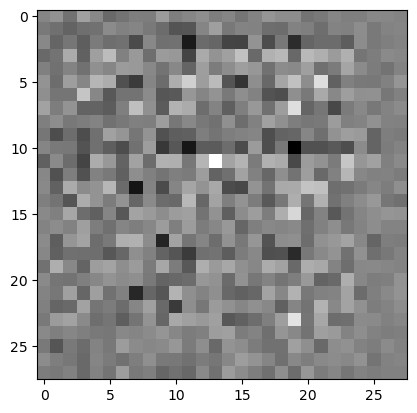

In [76]:
plt.imshow(y.squeeze(0).detach().numpy(), cmap="gray")
plt.show()